# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The smart cab doesn't seem to be moving but always staying idle at the same intersection. At first, the lights were green (specifically in one of the simulation I ran they were green first) and was receiving negative numerical rewards as the Smartcab was supposed to drive but stayed idle. The value of the rewards at that time in this example were -5.65 for every unit of time passed. Then, after a little bit, the lights turned red. So now, since staying idle is the right thing to do, it was receiving a postive reward of 1.62 for every unit of time passed.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**agent.py**
* **update_delay:** can input a float number. If not specified, it will default to 2.0 seconds. This flag will set how fast the simulation will update between states/actions. I would assume that a higher value would be great for slowly going through and understanding what my SmartCab is doing while a lower value is great if I want to train very quickly
* **n_test:** can input an integer. If not specified, defaults to 0. This flag is for when I am ready to test my SmartCab. It specifies the number of testing trials that will be performed on my SmartCab.
* **grid_size:** can input a tuple of two integers. If not specified, it will default to (8, 6). This flag will set how big the city my SmartCab is in where each grid is an intersection. I would assume that the larger the grid, the longer to train and the more complex the paths

**environment.py**
Based on the description , *"Consider an action and perform the action if it is legal. Receive a reward for the agent based on traffic laws."*, I would say the method act() makes an agent perform an action

**simulator.py**
Both '`render_text()`' and '`render()`' perform very similar functionality. Both methods give you a way to display what is going on in the simulation. The difference is that '`render_text()`' displays it to the terminal while `'render()`' uses a nice looking GUI by making use of pygame.

**planner.py**
These lines:
```
# Next check if destination is cardinally East or West of location    
        elif dx != 0:
```
Which are one of the first lines to be considered within the method, tell me that `next_waypoint()` considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


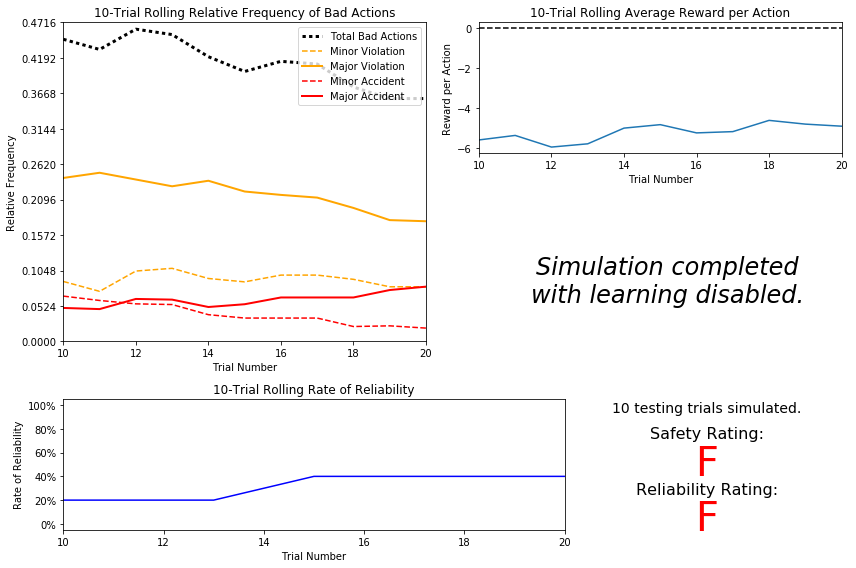

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
1. As seen in the top-right visualization, the driver makes bad actions almost have the time, ranging from 36%-47%. In terms of accidents and not accidents and bad decisions, this occurs about 10% of the time. This makes sense since there is not a lot of cars so the chances of a bad decision causing an accident is low
2. I would say the rate of reliability does make sense even though originally I thought it would be closer to 10%. As it's seen, the reliability ranges from 20%-40%. Since the default grid size is fairly small, it's fair to say that on random, the cab will reach the destination on time at this rate.
3. The agent receives negative rewards, ranging from -4 to -6. This suggest that the driver was penalized heavily in those big mistakes such as those that cause accidents. 
4. Suprisingly, in my training, it seems as though the outcome of results keep increasing, but this increase is so small that it's within a range that accounts for the cab's randomness. Thus, the results don't change much over all the trials.
5. With a 20%-40% reliability rate and an F for reliability, I would say it isn't reliable since a passenger would get to a destination less than half the time. And with a bad action frequency of almost 50% and an F safety rating, it would be very unsafe.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

**Relevant**
* **Lights:** as a driver, I would need to know whether my intended direction at an intersection is safe. For example, I can't go straight or left if the light is red. Additionally, to be efficient, I would want to drive forward no matter what if there is a green light
* **Left:** to make a valid right turn I would need to know whether there is a car coming towards me from the left (if the light is red) and I am far away enough to be able to drive in front of it into the lane it's driving in. Similarly, for efficiency, I wouldn't want to wait for it to be a green light to turn right when it is legal to turn right on red lights.
* **Oncoming:** to make a valid left turn I would need to know whether a car is coming towards me to know whether it is safe for me to cross its path. Similarly, for efficiency, I wouldn't want to make 3 back-to-back right turns when I can just go left
* **Waypoint:** In combination with the other 3, this helps make sure that the cab is definitely efficient by making sure it is making a correct turn.

**Not Relevant**
* **Deadline:** this only has to do with time taken. We won't endanger the passenger by being late. Additionally, it would be bad if the smartcab learnt that being on time has a great reward even though the cab made several traffic violations. Thus, this would help in Q learning by not only reducing the the size of the state space (as discussed in the next section), but also make sure it is learning correctly.
* **Right:** to make a right in any circumstance, I only need to know if someone is coming from the left (if someone oncoming wants to turn left, aka my right, they would need to give me the right of way). Also, in any circumstance, if I wanted to go straight, I would only need to know if the lights are green. Finally, if I want to go left, I would only need to know about the lights and oncoming traffic. Thus, there is no reason for me to know about the person on my right side.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
Through learning using the relevant states, we would have:
* 2 states for lights (red, green)
* 4 for left (none, forward, left, right)
* 4 for oncoming (none, forward, left, right)
* 3 for waypoint (forward, left, right)

Giving us a total of 2x4x4x3=96 possible different combinations of states, which multiply that by 4 again for 4 different possible actions (stop, left, right, forward) giving us a state space of 384 different combinations of states and the smartcar's corresponding decision.

This is not that large of a number, so I would say the smartcab would learn relatively quickly.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

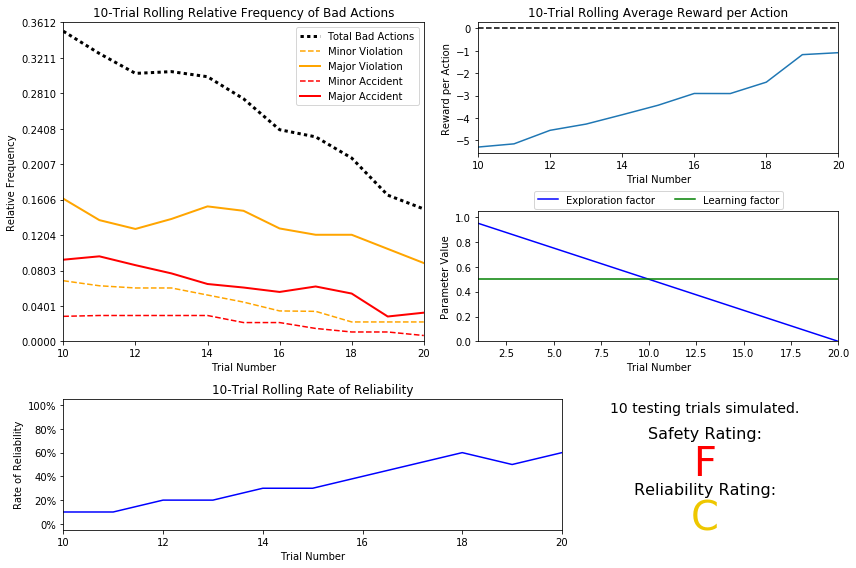

In [16]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
1. There are very few similarities, but some of them are things such as the fact the reward per action still stays negative for both, and having an F for the safety due to the smartcab still getting into major accidents
2. It took approximatelly 20 training trials before testing which makes sense since testing will occur once epsilon is below 0.01 (the epsilon threshold). And since 1-0.05*20=0<0.01, it will start training after 20 training trials
3. Since the exploration factor is decreasing linearly, the grpah does accurately represent my decay function which decreased by 0.05 for each new state over all trials.
4. As the number of training trials increased, the number of bad actions decreased and the average reward increased. This is because Q-learning has been training the smartcab and the smartcab has been able to start using past experiences to make future decisions

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

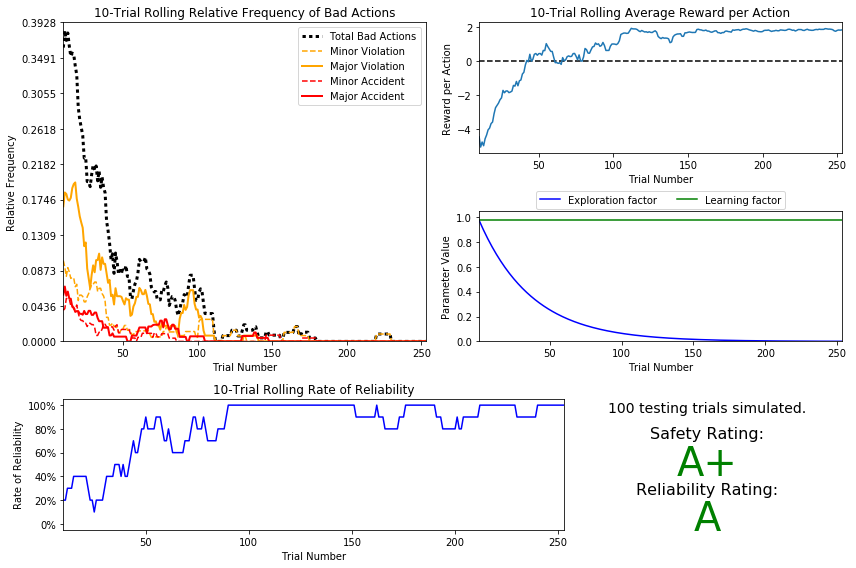

In [32]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv') 
# tolerance = 0.001
# decay func = e^-at
# epsilon=1.5
# alpha = 1

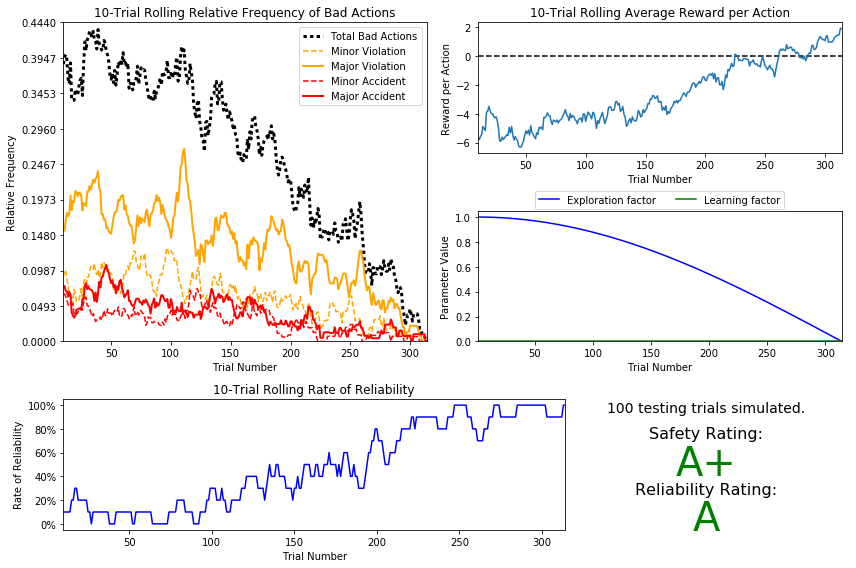

In [29]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
# tolerance = 0.001
# decay func = ABS(cos(at))
# epsilon = 1.5
# alpha = 0.005

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

Out of the two models I have shown above (I also did some experimentation on my own), I'll discuss the first one since it has a similar rating but trained in fewer steps
1. I used the decay function $$\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px}$$
2. I needed approximately 250 training trials before testing
3. I used an epsilon tolerance of 0.001 and alpha of 1. I picked a low tolerance in order to make sure the smartcab had enough time to train and validate it's policies before it went on to train. I also picked a value for alpha that lets the exponential function decrease at a fast enough rate in order to reach below the tolerance without taking too many training trials. If I had a higher tolerance like 0.01, I'd likely choose a lower alpha like 0.6 as these hyper-parameters have an inverse relationship in terms of training a model for this decay function.
4. With an near 100% reliability, less than 4% rate of bad actions, positive reward per action, and great safety and reliability ratings, this model does a lot better than the previous model. A big part of it is that this model let the smartcab train over more trials. If we used the default Q-Learner again but with a decay of epsilon -= 0.0005, we may get a similar result due to it training for longer (as seen below with 100 tests). As important as deciding the relationship between exploring and making the right decision is, it's also very important to experience as many different scenarios as the model can so that in testing, it won't have to make a random decision when put into a never before seen scenario.
5. Since my Q-learner achieves near perfect ratings with an A+ for safety and A for reliability, I would say my driving agent successfully learned an appropriate policy.
6. Since they are nearly perfect resulting in a smartcab that has successfully learned the rules of this environment, I would say I'm satisfied with the results.

**SIDE NOTE:**
I did notice an interesting observation. If you take a look at my first Q-Learner with a decay function of e^-at, the exploration factor function is concave up. While for the second one with decay function cos(at) it is concave down. Meaning, the first one prioritized validating past scenario's decisions instead of trying out new actions while the second one does the opposite. Similarly, The first one's graph of violations decreased quickly as a result of it learning quickly what bad actions are and making sure not to do them through the use of a concave up exploration function while the second one has violations occur throughout since it is very common for it to explore new ideas which can result in acccidents. Finally, the reliability and reward per action of the first learner increases quickly and stays high as a result of it not exploring as much while the second one is the complete opposite. Finally, if you look below at the linear exploring function Q-Learner, it's sort of in between for all the graphs since it doesn't prioritize either learning or making the right decision. 

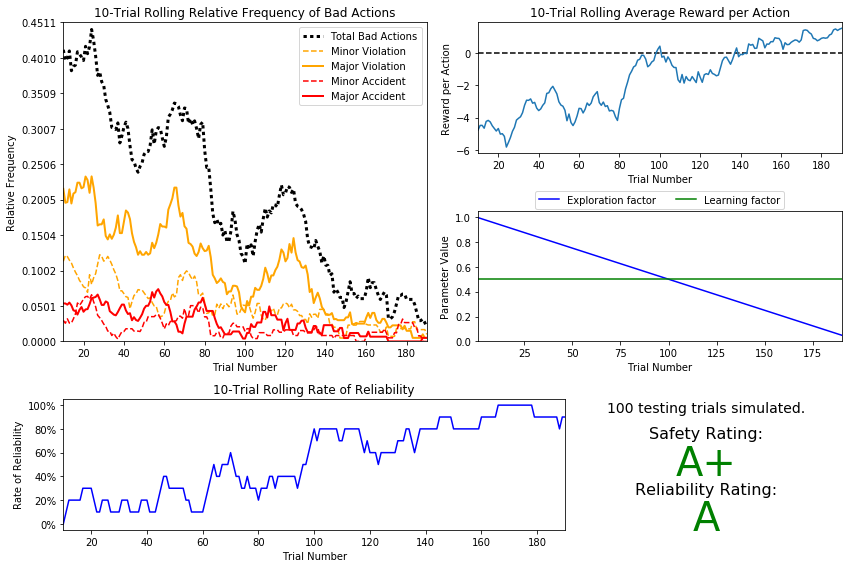

In [34]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
# default Q-Learner with decay epsilon -= 0.008 and tolerance

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
My example of an optimal policy would be wanting to turn right at a red light with no oncoming traffic and traffic coming from the left. The possible actions for this state and their corresponding policy looks like this:

| State                         | Action        | Policy     |
| ----------------------------- |:-------------:| ----------:|
| ('right', 'red', None, None)  | Left          | Violation  |
| ('right', 'red', None, None)  | None          | Suboptimal |
| ('right', 'red', None, None)  | Forward       | Violation  |
| ('right', 'red', None, None)  | Right         | Optimatal   |

In `sim_improved-learning.txt` I found this policy:

('right', 'red', None, None)
 
 -- forward : -10.13
 
 -- None : 1.58
 
 -- right : 1.05
 
 -- left : -10.54
 
The highest Q-value for this policy is 1.58 which is staying at the stop which is the suboptimal policy. The optimal polcy is second with a Q value of 1.05. So this Q-Learner has not learned the best policy for this state. But it has learning that you cannot go forward or left at the right light when wanting to turn right. It's suboptimal in that it isn't reliable in driving to the destination in the fastest amount of time, but it is still optimal in terms of safety.

An optimal policy in the Q-Learner would be what to do when wanting to turn left at a red:

('left', 'red', None, None)
 
 -- forward : -9.92
 
 -- None : 2.25
 
 -- right : 0.39
 
 -- left : -10.17
 
 In this state, since None has a Q-value of 2.25 which is the highest, the smartcab will make the optimal decision and not go anywhere. It has learned that going right is OK, but not optimal since it's driving away from the waypoint. It has also learned that it is illegal to drive forward or turn left at a red light.
 
 A suboptimal policy as a result of not enough training would be wanting to go forward at a green with oncoming traffic and traffic on the smartcab's left wanting to turn left
 
('forward', 'green', 'left', 'left')
 
 -- forward : 0.00
 
 -- None : -0.04
 
 -- right : 0.00
 
 -- left : 0.88
 
 In this state, since going left has the highest Q-value, the smartcab will make the suboptimal decision of going left. It won't cause an accident, but it is bad for the smartcab's reliability rating. The issue is that the Q-Learner has experienced enough training trials since it hasn't learned enough. This can be seen through the fact going right, another suboptimal policy, and going forward, the optimal policy, still hasn't been tried by the Q-Learner.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think that the smartcab characteristic has to do with how the smartcab knows where the destination is. In terms of navigating to the right location, the cab doesn't have an (x,y) pair to know exactly where the destination is located; it only knows whether it has to go left, straight, or right at a certain intersection. So if we were to somehow feed the Q-Learner future rewards, we would need to give it specific directions like "go left, then right, then straight, then stop" but this wouldn't work as these directions can change based on the driver making a wrong turn or the lights being green not red or a car coming from some direction. 

Secondly, I think the environment characteristic has to do with the fact that the destination is random every time. If there was only one possible location then that would work as the Q-Learner would find the most optimum path to the destination. But because each time it is random, there is no way to get a Q-Learner to use future rewards to find the best route. For example, if we were to train it to reach point (1,1), the Q-Learner would figure out that being at point (1,1) is awesome and makes sure to get their everytime. But then, if we were to try and train it to get to point (3,4), it may fail as it would still want to get to point (1,1) but then realize that there is no reward there anymore. Or eventually, the Q-Learner would learn that every intersection is it's goal and effectly resulting in no information gained about traversing its environment (could even start believing it should visit every intersection all the time and thus being late to its destination).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.